In [ ]:
from google.colab.patches import cv2_imshow

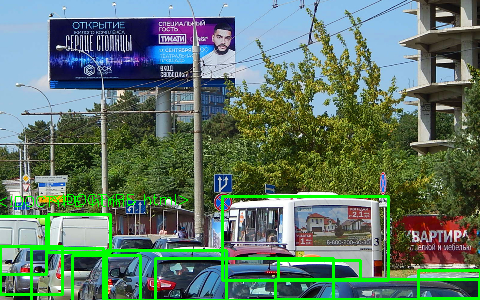

In [ ]:
import cv2
import numpy as np

# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load image
img = cv2.imread("6.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detect objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# Show information on screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = center_x - w / 2
            y = center_y - h / 2
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv2.FONT_HERSHEY_SIMPLEX
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        cv2.rectangle(img, (round(x), round(y)), (round(x + w), round(y + h)), (0, 255, 0), 2)
        cv2.putText(img, label, (round(x), round(y - 10)), font, 0.5, (0, 255, 0), 1)

# Show image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from google.colab import files

In [ ]:
files.upload()

{}

In [ ]:
!wget https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov3.cfg
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://github.com/pjreddie/darknet/blob/master/data/coco.names

In [ ]:
!wget https://1tulatv.ru/sites/default/files/inline/images/31b9bffa-8eb6-43d9-804d-8deef86e8b8d.jpg

In [ ]:
!wget https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4-p6.cfg
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-p6.weights